# Setup

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net
from diff_equation import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)
np.random.seed(10)

# Training Data and Nondimensionalization

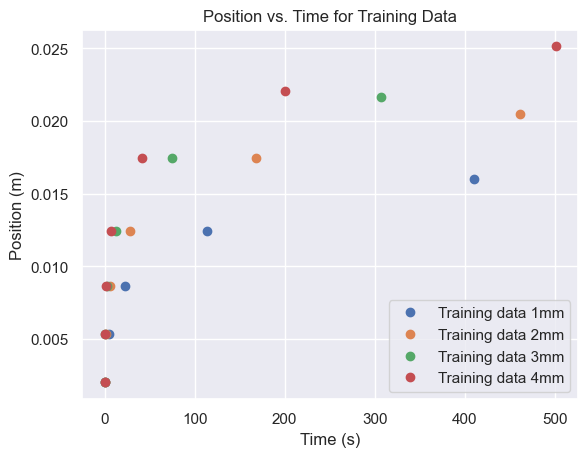

In [17]:
# Define legends for dimensionalized and nondimensionalized data
dim_legend = ['Training data 1mm', 'Training data 2mm', 'Training data 3mm', 'Training data 4mm']
nondim_legend = ['Nondim training data 1mm', 'Nondim training data 2mm', 'Nondim training data 3mm', 'Nondim training data 4mm']

# Functions to plot dimensionalized and nondimensionalized data
def plot_dim_data(show=True):
    for i in range(0, len(dim_data)):
        plt.plot(dim_data[i]['TIME'], dim_data[i]['DISTANCE'], 'o')
    plt.legend(dim_legend)
    plt.ylabel('Position (m)')
    plt.xlabel('Time (s)')
    plt.title('Position vs. Time for Training Data')
    if show:
        plt.show()

def plot_nondim_data(show=True):
    for i in range(0, len(nondim_data)):
        plt.plot(nondim_data[i]['TIME'], nondim_data[i]['DISTANCE'], 'o')
    plt.legend(nondim_legend)
    plt.ylabel('Scaled Position')
    plt.xlabel('Log-Scaled Time')
    plt.title('Scaled Position vs. Time for Training Data')
    if show:
        plt.show()

# Plot dimensionalized training data
plot_dim_data()

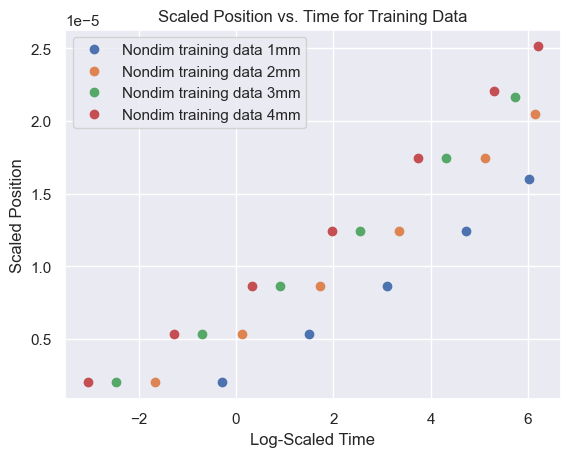

In [18]:
# Plot nondimensionalized training data
plot_nondim_data()

# Run the Model

Losses for 1mm droplet:
Epoch 1/10000, data loss: 34584.609375, physics loss: 12712061960192.0
Epoch 2/10000, data loss: 32522.93359375, physics loss: 9940014989312.0
Epoch 3/10000, data loss: 30547.017578125, physics loss: 7734743269376.0
Epoch 4/10000, data loss: 28669.126953125, physics loss: 6000058826752.0
Epoch 5/10000, data loss: 26898.12890625, physics loss: 4648394031104.0
Epoch 6/10000, data loss: 25239.625, physics loss: 3602939379712.0
Epoch 7/10000, data loss: 23695.9609375, physics loss: 2798559952896.0
Epoch 8/10000, data loss: 22299.478515625, physics loss: 2192910581760.0
Epoch 9/10000, data loss: 21044.99609375, physics loss: 1739239456768.0
Epoch 10/10000, data loss: 19885.1796875, physics loss: 1386115235840.0
Epoch 11/10000, data loss: 18816.44921875, physics loss: 1111090659328.0
Epoch 12/10000, data loss: 17834.234375, physics loss: 896462290944.0
Epoch 13/10000, data loss: 16933.205078125, physics loss: 728427462656.0
Epoch 14/10000, data loss: 16107.8515625, ph

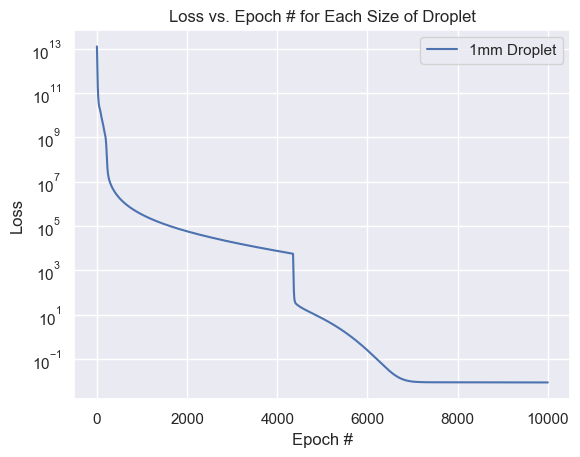

In [19]:
plt.yscale('log')
different_droplet_networks = [None] * len(dim_data)

'''
Train model for each droplet size, plot losses for each one.
Change the bounds on this loop and subsequent ones from '0', 'len(different_droplet_networks)' to '0', '1' to do only the 1mm droplet.
You can change the bounds similarly to only train the network for other-sized droplets.
'''
for i in range(0, 1):
# for i in range(0, len(different_droplet_networks)):
    different_droplet_networks[i] = Net(1, 1, droplet_size_idx=i, loss2=physics_loss_dim, epochs=10000, loss1_weight=10000, loss2_weight=1, lr=1e-5).to(DEVICE)
    print(f'Losses for {i+1}mm droplet:')
    losses = different_droplet_networks[i].fit(np.array(dim_data[i]['TIME']), np.array(dim_data[i]['DISTANCE']))
    print()
    plt.plot(losses)
plt.legend(['1mm Droplet', '2mm Droplet', '3mm Droplet', '4mm Droplet'])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch # for Each Size of Droplet')
plt.show()

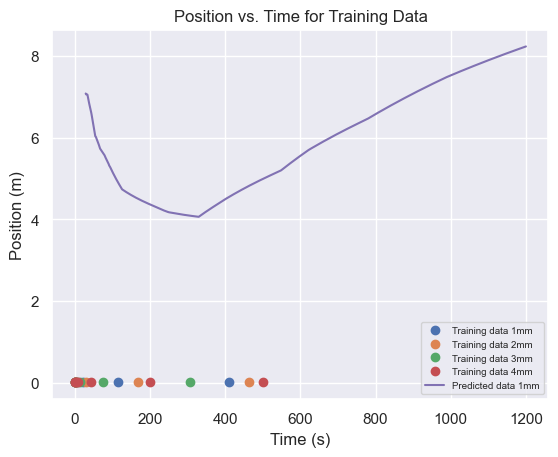

In [20]:
'''
Plot the dimensionalized data for each droplet as well as each respective dimensionalized model
'''

# Plot dimensionalized data
plot_dim_data(show=False)

# Use nondimensionalized model to make prediction
times = np.linspace(3.35, np.log(1200), 1200)
preds = different_droplet_networks[i].predict(times)

# Plot dimensionalized model
for i in range(0, 1):
# for i in range(0, len(different_droplet_networks)):
    plt.plot(np.exp(times), x_0*preds)
    dim_legend.append(f'Predicted data {i+1}mm')
plt.legend(dim_legend, fontsize=7)
plt.show()

In [21]:
# '''
# Plot the nondimensionalized data for each droplet as well as each respective nondimensionalized model
# '''

# # Plot nondimensionalized data
# plot_nondim_data(show=False)

# # Plot nondimensionalized model
# for i in range(0, 1):
# # for i in range(0, len(different_droplet_networks)):
#     plt.plot(times, preds)
#     nondim_legend.append(f'Predicted data {i+1}mm')
# plt.legend(nondim_legend, fontsize=7)
# plt.show()